# Dependencies

In [28]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# De-serializing data

In [29]:
cable = pickle.load(open('serialized files/cable.pkl', 'rb'))
cable

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
147,503,6.0,380700,23,38,0.0,18.0,DSTV,Pay TV,Cable TV
181,929,6.0,2460,1,40,0.0,501.0,GOTV,Pay TV,Cable TV
573,1649,6.0,34995,5,67,0.0,447.0,DSTV,Pay TV,Cable TV
1674,56,6.0,86930,9,158,0.0,501.0,DSTV,Pay TV,Cable TV
1678,752,6.0,2460,1,159,0.0,447.0,GOTV,Pay TV,Cable TV
1766,56,6.0,10980,5,179,0.0,501.0,GOTV,Pay TV,Cable TV
1850,553,6.0,10400,1,196,0.0,501.0,DSTV,Pay TV,Cable TV
1983,56,6.0,8400,2,221,0.0,501.0,Startimes,Pay TV,Cable TV
2055,700,6.0,10400,1,257,0.0,417.0,DSTV,Pay TV,Cable TV
2063,700,6.0,1600,2,261,0.0,417.0,GOTV,Pay TV,Cable TV


# Preprocessing

In [30]:
cable = cable[['user_id', 'TotalTransactionAmount', 'Tx_Count', 'DaysSinceLastTrans']]
cable

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
147,503,380700,23,38
181,929,2460,1,40
573,1649,34995,5,67
1674,56,86930,9,158
1678,752,2460,1,159
1766,56,10980,5,179
1850,553,10400,1,196
1983,56,8400,2,221
2055,700,10400,1,257
2063,700,1600,2,261


In [31]:
cable.describe()

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
count,23.000000,23.00000,23.000000,23.000000
mean,707.173913,47075.00000,5.304348,171.391304
std,669.661288,92961.14995,7.251550,88.740039
min,18.000000,900.00000,1.000000,35.000000
25%,384.000000,3082.50000,1.000000,95.000000
50%,553.000000,9230.00000,2.000000,179.000000
75%,767.500000,39847.50000,5.500000,249.000000
max,2499.000000,380700.00000,24.000000,296.000000


In [32]:
cable_customers = cable.groupby(['user_id']).agg({
    'TotalTransactionAmount': 'sum',
    'Tx_Count': 'count',
    'DaysSinceLastTrans' : 'sum'
})

cable_customers.rename(columns={'TotalTransactionAmount': 'Amount',
                                 'Tx_Count': 'Freq',
                                'DaysSinceLastTrans': 'Re'}, inplace=True)
cable_customers

,Amount,Freq,Re
user_id,,,
18,9230,1,193
56,106310,3,558
183,250800,1,175
384,7075,2,498
424,19200,1,295
464,49305,2,590
503,380700,1,38
553,10400,1,196
700,12000,2,518


In [33]:
print(cable_customers.Re.skew())
print(cable_customers.Freq.skew())
print(cable_customers.Amount.skew())

0.7033167541706082
1.1831161204460692
2.187201901882429


## Converting Data to Gaussian Distribution

### Visualization

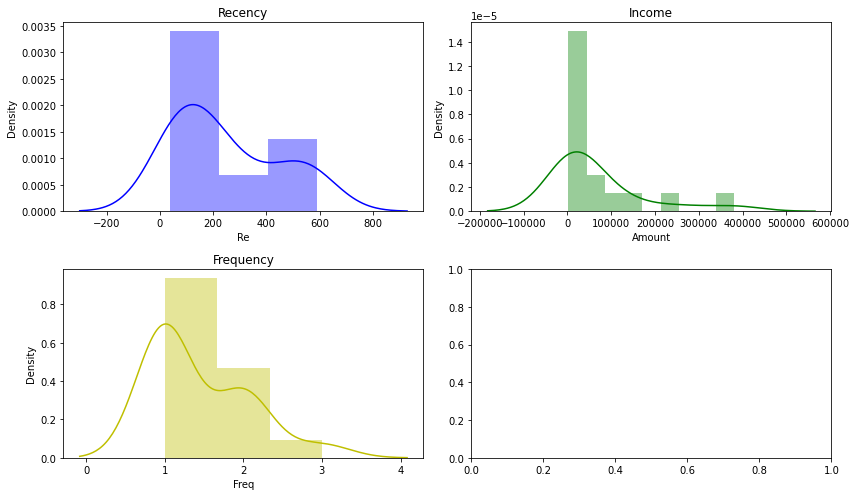

In [34]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(cable_customers.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(cable_customers.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(cable_customers.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Log Transformation

In [35]:
log_trans = pd.DataFrame()
log_trans['Amount'] = np.log(cable_customers['Amount'])
log_trans['Freq'] = np.log(cable_customers['Freq'])
log_trans['Re'] = np.log(cable_customers['Re'])

print(log_trans.Re.skew())
print(log_trans.Freq.skew())
print(log_trans.Amount.skew())

-0.20196282787980485
0.8148898368366649
0.35220066167520314


#### After-Log-Transformation

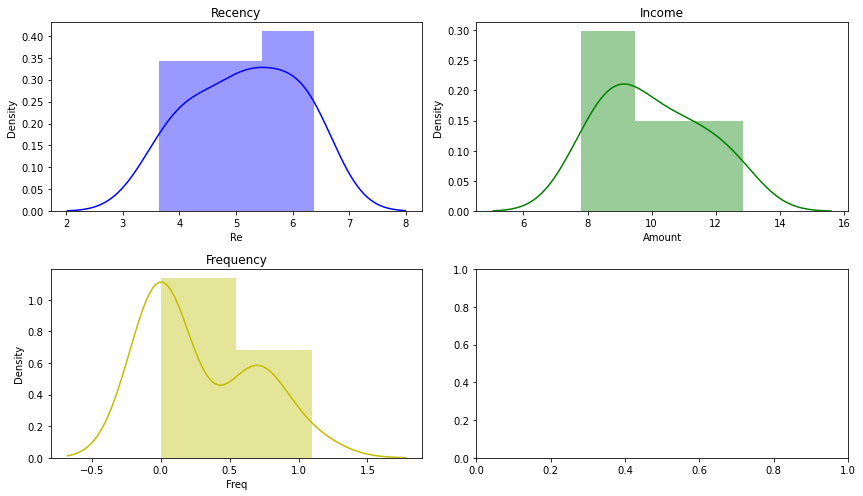

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(log_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(log_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(log_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### BoxCox Transfromation

In [37]:
boxcox_trans = pd.DataFrame()
boxcox_trans['Amount'] = stats.boxcox(cable_customers['Amount'])[0]
boxcox_trans['Freq'] = stats.boxcox(cable_customers['Freq'])[0]
boxcox_trans['Re'] = stats.boxcox(cable_customers['Re'])[0]

print(boxcox_trans.Re.skew())
print(boxcox_trans.Freq.skew())
print(boxcox_trans.Amount.skew())

-0.05652547278340864
0.5942944806646726
0.08246751649473173


#### After-Boxcox-Transformation

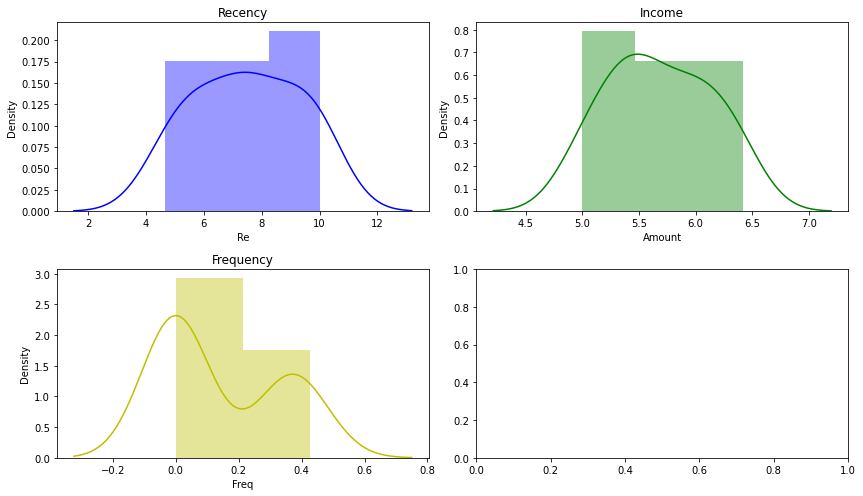

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(boxcox_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(boxcox_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(boxcox_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Cubic Root Transformation

In [39]:
square_trans = pd.DataFrame()
square_trans['Amount'] = np.cbrt(cable_customers['Amount'])
square_trans['Freq'] = np.cbrt(cable_customers['Freq'])
square_trans['Re'] = np.cbrt(cable_customers['Re'])

print(square_trans.Re.skew())
print(square_trans.Freq.skew())
print(square_trans.Amount.skew())

0.15366999404572737
0.9088945990726902
1.058006378342817


#### After-Cubic-Root-Transformation

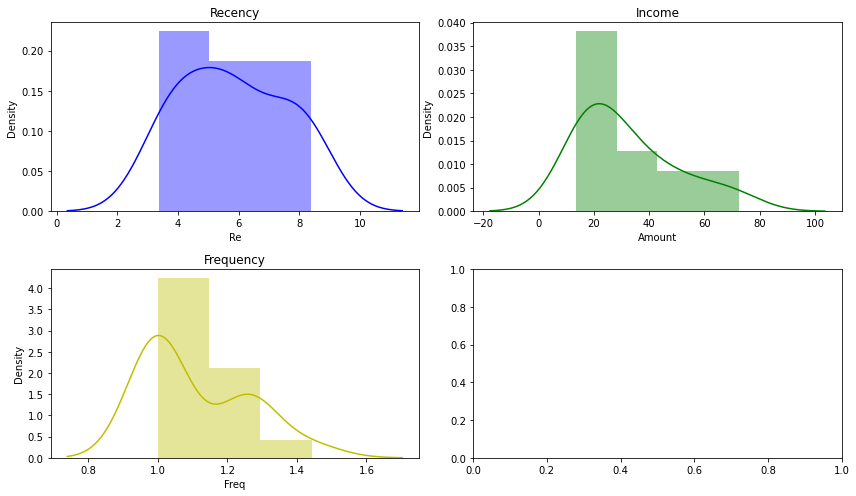

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(square_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(square_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(square_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

<b>BOX COX Transfroms the Data Better</b>

### Normalization

In [41]:
scale = StandardScaler()
scale.fit(boxcox_trans)
cable_normalized = scale.transform(boxcox_trans)

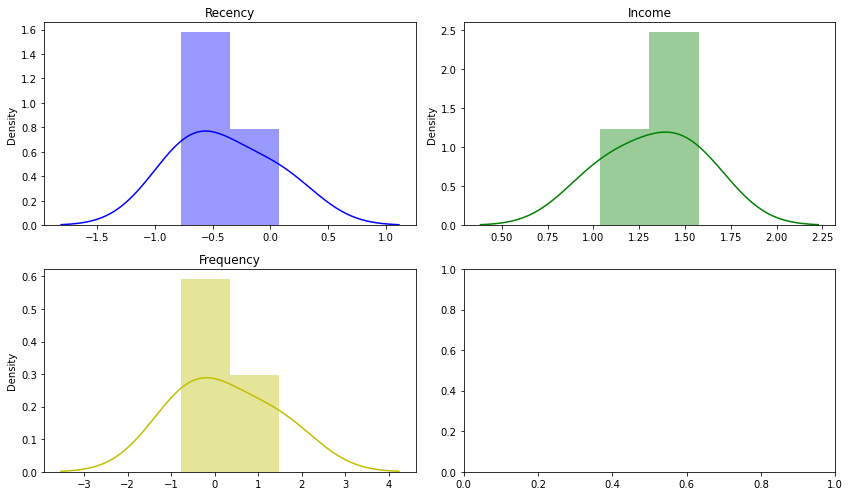

[ 0.  0. -0.]
[1. 1. 1.]


In [42]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(cable_normalized[0], color='b', ax=ax[0, 0])
fig = sns.distplot(cable_normalized[1], color='g', ax=ax[0, 1])
fig = sns.distplot(cable_normalized[2], color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

print(cable_normalized.mean(axis = 0).round(2))
print(cable_normalized.std(axis = 0).round(2))

# Clustering

## Hyperparameter Tuning using the Elbow Method

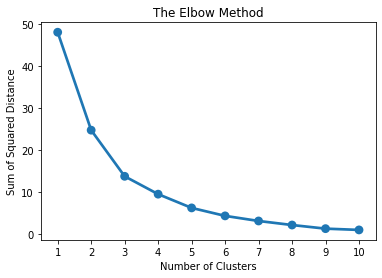

In [43]:
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cable_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [44]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(cable_normalized)
model.labels_

array([2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2])

## Matching labels with each customer

In [45]:
cable_customers["Cluster"] = model.labels_
cable_customers.groupby('Cluster').agg({
    'Re':'mean',
    'Freq':'mean',
    'Amount':['mean', 'count']}).round(2)
cable_customers

,Amount,Freq,Re,Cluster
user_id,,,,
18,9230,1,193,2
56,106310,3,558,1
183,250800,1,175,0
384,7075,2,498,1
424,19200,1,295,2
464,49305,2,590,1
503,380700,1,38,0
553,10400,1,196,2
700,12000,2,518,1


## Melting the Dataframe

In [46]:
df_normalized = pd.DataFrame(cable_normalized, columns=['Re', 'Freq', 'Amount'])
df_normalized['Cust ID'] = cable_customers.index
df_normalized['Cluster'] = model.labels_

df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['Cust ID', 'Cluster'],
                      value_vars=['Re','Freq','Amount'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt

,Cust ID,Cluster,Attribute,Value
0,18,2,Re,-0.505489
1,56,1,Re,1.035984
2,183,0,Re,1.475392
3,384,1,Re,-0.703218
4,424,2,Re,0.006570
5,464,1,Re,0.600814
6,503,0,Re,1.672697
7,553,2,Re,-0.418841
8,700,1,Re,-0.316627
9,710,2,Re,-1.082279


### Visualization

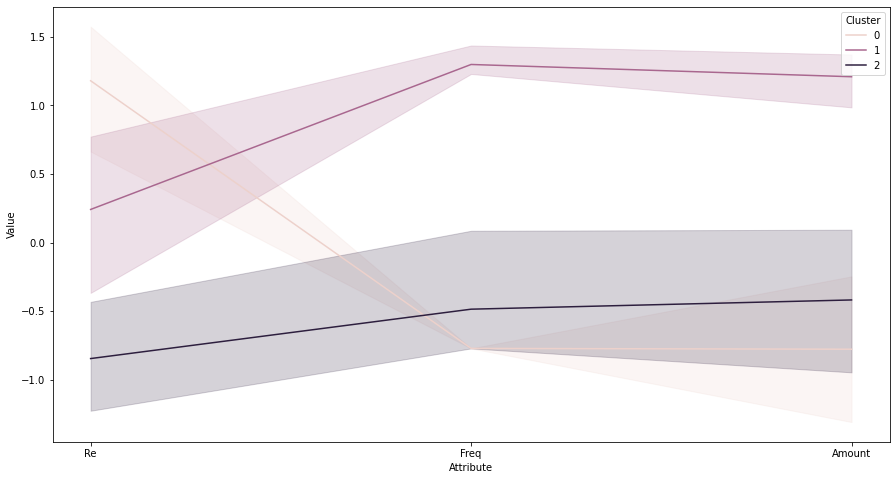

In [47]:
plt.figure(figsize=(15, 8))
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()